# EDA and Feature Engineering

## Import Libraries and Dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [2]:
total = pd.read_csv('./total_data_cleaned.csv')
total.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,doi,year,month,day,volume,issue,journal,title,text,abstract,keywords,publisher,retraction_binary,unpacked_keywords,clean_text,clean_text_lem
0,0,0,0,10.1208/s12249-016-0596-x,2016.0,8.0,10.0,18.0,5.0,AAPS PharmSciTech,Study of the Transformations of Micro/Nano-cry...,‘Polymorphism’ generally referred as the abili...,This study elucidates the physical properties ...,"['monoclinic', 'nano-sized crystals', 'orthorh...",Springer International Publishing,1,"['monoclinic', 'nano-sized', 'crystals', 'orth...",Polymorphism generally referred as the ability...,Polymorphism generally referred a the ability ...
1,1,1,1,10.1021/acscentsci.9b00224,2019.0,5.0,9.0,5.0,6.0,ACS central science,Targeted Protein Internalization and Degradati...,Traditional\ndrug development efforts are focu...,Targeted,[],American Chemical Society,1,[],Traditional drug development efforts are focus...,Traditional drug development effort are focuse...
2,2,2,2,10.1021/acsomega.8b00488,2018.0,6.0,27.0,3.0,6.0,ACS omega,Regulating the Microstructure of Intumescent F...,Intumescent flame retardants\nare now being us...,A compatibilizer,[],American Chemical Society,1,[],Intumescent flame retardants are now being use...,Intumescent flame retardant are now being used...
3,3,3,3,10.1021/acsomega.8b00153,2018.0,6.0,25.0,3.0,6.0,ACS omega,Solid-to-Solid Crystallization of Organic Thin...,Crystal growth process is basic and essential ...,The solid-to-solid crystallization processes o...,[],American Chemical Society,1,[],Crystal growth process is basic and essential ...,Crystal growth process is basic and essential ...
4,4,4,4,10.1107/S1600536811022574,2011.0,6.0,18.0,67.0,NaN,"Acta crystallographica. Section E, Structure r...",Oxonium picrate.,For general background to organic salts of pic...,"The title compound, H3O+·C6H2N3O7",[],International Union of Crystallography,1,[],For general background to organic salts of pic...,For general background to organic salt of picr...


In [3]:
total = total.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [5]:
total.columns

Index(['doi', 'year', 'month', 'day', 'volume', 'issue', 'journal', 'title',
       'text', 'abstract', 'keywords', 'publisher', 'retraction_binary',
       'unpacked_keywords', 'clean_text', 'clean_text_lem'],
      dtype='object')

In [14]:
no_retract = pd.read_csv('./no_retraction_data_cleaned.csv')
no_retract = no_retract.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [15]:
retract = pd.read_csv('./retraction_data_cleaned.csv')
retract = retract.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [345]:
total['year'] = total['year'].astype(str)
total['month'] = total['month'].astype(str)
total['day'] = total['day'].astype(str)
total['volume'] = total['volume'].astype(str)
total['issue'] = total['issue'].astype(str)

retract['year'] = retract['year'].astype(str)
retract['month'] = retract['month'].astype(str)
retract['day'] = retract['day'].astype(str)
retract['volume'] = retract['volume'].astype(str)
retract['issue'] = retract['issue'].astype(str)

no_retract['year'] = no_retract['year'].astype(str)
no_retract['month'] = no_retract['month'].astype(str)
no_retract['day'] = no_retract['day'].astype(str)
no_retract['volume'] = no_retract['volume'].astype(str)
no_retract['issue'] = no_retract['issue'].astype(str)

In [346]:
total.loc[total['abstract'].isnull()==True].index

Int64Index([  45,  183,  186,  217,  286,  346,  462,  698,  744,  783,
            ...
            4788, 4805, 4811, 4823, 4847, 4848, 4850, 4862, 4893, 4960],
           dtype='int64', length=240)

In [12]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   doi                4964 non-null   object 
 1   year               4368 non-null   float64
 2   month              4368 non-null   float64
 3   day                4368 non-null   float64
 4   volume             4602 non-null   float64
 5   issue              2695 non-null   float64
 6   journal            4964 non-null   object 
 7   title              4964 non-null   object 
 8   text               4964 non-null   object 
 9   abstract           4724 non-null   object 
 10  keywords           4964 non-null   object 
 11  publisher          4952 non-null   object 
 12  retraction_binary  4964 non-null   int64  
 13  unpacked_keywords  4964 non-null   object 
 14  clean_text         4964 non-null   object 
 15  clean_text_lem     4964 non-null   object 
dtypes: float64(5), int64(1),

## Feature Engineering

### Unpacking Keywords

#### Retraction

In [8]:
#https://stackoverflow.com/questions/40950791/remove-quotes-from-string-in-python
keywords_list = []
count = 0
for i in retract['keywords']:
    if i == []:
        pass
    else:
        for j in i.split():
            keywords_list.append(j.replace("'",'').replace('[','').replace(',','').replace(']','').replace('(','').replace(')','').replace('\\n', '').replace('\\n','').lower())

In [9]:
#cells -> cell
lemmatizer = WordNetLemmatizer()
ls_keywords = []
for i in keywords_list:
    ls_keywords.append(lemmatizer.lemmatize(i))
pd.Series(ls_keywords).value_counts().head(11)

            663
cell        186
antibody    116
cancer      112
response     89
disease      84
health       79
factor       71
theory       67
gene         66
hiv          61
dtype: int64

#### No Retractions

In [10]:
keywords_list = []
count = 0
for i in no_retract['keywords']:
    if i == []:
        pass
    else:
        for j in i.split():
            keywords_list.append(j.replace("'",'').replace('[','').replace(',','').replace(']','').replace('(','').replace(')','').replace('\\n', '').replace('\\n','').lower())

In [11]:
lemmatizer = WordNetLemmatizer()
ls_keywords = []
for i in keywords_list:
    ls_keywords.append(lemmatizer.lemmatize(i))
pd.Series(ls_keywords).value_counts().head(11)

              839
health        535
cell          492
mental        397
protein       268
response      261
assessment    252
theory        250
disease       248
disorder      245
heat          238
dtype: int64

### Word Count

In [12]:
list_words = []
for i in range(0, len(total['clean_text'])):
    list_words.append(len(total['clean_text'][i].split()))
total['num_words'] = list_words 

### Character Length

In [13]:
list_words = []
for i in range(0, len(total['clean_text'])):
    list_words.append(len(total['clean_text'][i]))
total['character_length'] = list_words 

### Animal Studies

In [268]:
total.shape

(4964, 16)

In [274]:
animal_terms = ['IACUC', 'mouse', 'mice', 'rats', 'rat', 'hamster', 'hamsters', 'pigs', 'rabbits', 'rabbit', 
                'cat', 'cats', 'dog', 'dogs', 'ungulate', 'ungulates', 'pig', 'horse', 'donkey', 'goat',
               'bovine', 'porcine', 'murine','chicken']

#http://vetmed.tamu.edu/media/2005639/vadnais%20protein%20therapeutics%202017.pdf
#https://www.ncbi.nlm.nih.gov/books/NBK218261/

In [ ]:
list_articles = []
iacuc = []
for i in range(0, len(total['clean_text'])):
    count = 0
    for j in total['clean_text'][i].split():
        for k in animal_terms:
            if j == k:
                if i not in list_articles:
                    list_articles.append(i)
                    iacuc.append(1)
                    count = 1
            else:
                pass
    if count == 0:
        iacuc.append(0)
    else:
        pass
        
print(list_articles)            
print(len(list_articles))
print(len(iacuc))

In [276]:
total['animal_binary'] = iacuc

In [280]:
list_articles = []
list_words = []
for i in range(0, len(total['clean_text'])):
    count = 0
    iacuc = []
    for j in total['clean_text'][i].split():
        for k in animal_terms:
            if j == k:
                if i not in list_articles:
                    if j not in iacuc:
                        list_articles.append(i)
                        iacuc.append(k)
                        count = 1
            else:
                pass
    if count == 0:
        list_words.append([])
    else:
        list_words.append(iacuc)
                    
print(len(list_articles))
print(len(iacuc))
print(list_words[0:5])

1874
0
[[], [], [], [], []]


In [283]:
print(len(list_words))
print(list_words[20:25])

4964
[[], ['rabbit'], ['bovine'], [], []]


In [305]:
total['animal_words'] = list_words

In [306]:
total['animal_words'][:1537].value_counts(normalize=True)

[]           0.493819
[mice]       0.147690
[mouse]      0.085231
[bovine]     0.082628
[rats]       0.048796
[rat]        0.037736
[rabbit]     0.025374
[murine]     0.023422
[dogs]       0.013012
[goat]       0.009109
[chicken]    0.006506
[rabbits]    0.005205
[pigs]       0.004554
[horse]      0.003904
[dog]        0.002602
[pig]        0.002602
[cat]        0.002602
[cats]       0.001952
[porcine]    0.001952
[hamster]    0.000651
[IACUC]      0.000651
Name: animal_words, dtype: float64

In [292]:
total['animal_words'][1537:].value_counts(normalize=True)

[]             0.680187
[mice]         0.102422
[mouse]        0.047272
[bovine]       0.037350
[rats]         0.030931
[rabbits]      0.016924
[murine]       0.016924
[rat]          0.016633
[dogs]         0.007879
[rabbit]       0.006711
[pigs]         0.005836
[cat]          0.004961
[chicken]      0.004669
[pig]          0.004085
[goat]         0.004085
[dog]          0.003502
[porcine]      0.003502
[horse]        0.002918
[IACUC]        0.001167
[hamster]      0.000875
[hamsters]     0.000584
[ungulates]    0.000292
[cats]         0.000292
Name: animal_words, dtype: float64

### Human Studies

In [321]:
total.shape

(4964, 19)

In [ ]:
list_articles = []
irb = []
for i in range(0, len(total['clean_text'])):
    count = 0
    word_count = 0
    for j in total['clean_text'][i].split():
        if j == 'IRB' or j == 'case':
            if j =='IRB':
                if i not in list_articles:
                    list_articles.append(i)
                    irb.append(1)
                    count = 1
            else:
                try:
                    if total['clean_text'][i].split()[word_count+1] == 'study':
                        if i not in list_articles:
                            list_articles.append(i)
                            irb.append(1)
                            count = 1
                            print(f"{j} {total['clean_text'][i].split()[word_count+1]}")
                    else:
                        pass
                except:
                    pass            
        else:
            pass
        word_count += 1
    if count == 0:
        irb.append(0)
    else:
        pass
        
print(list_articles)            
print(len(list_articles))
print(len(irb))

In [331]:
total['irb_binary'] = irb
total['irb_binary'][:1537].value_counts(normalize=True)

0    0.956409
1    0.043591
Name: irb_binary, dtype: float64

In [332]:
total['irb_binary'][1537:].value_counts(normalize=True)

0    0.950686
1    0.049314
Name: irb_binary, dtype: float64

### Regulatory Binary

In [353]:
regulatory = []
for i in range(0, len(total['irb_binary'])):
    if total['irb_binary'][i] == 1 or total['animal_binary'][i] == 1:
        if total['irb_binary'][i] == 1 and total['animal_binary'][i] == 1:
            regulatory.append(2)
        else:
            regulatory.append(1)
    else:
        regulatory.append(0)
len(regulatory)

4964

In [360]:
total['reg_binary'] = regulatory
total = total.rename(columns={'reg_binary':'regulatory'})
total['regulatory'][:1537].value_counts(normalize=True)

1    0.488614
0    0.480807
2    0.030579
Name: regulatory, dtype: float64

In [361]:
total['regulatory'][1537:].value_counts(normalize=True)

0    0.642836
1    0.345200
2    0.011964
Name: regulatory, dtype: float64

### Review Binary

In [ ]:
list_articles = []
review = []
for i in range(0, len(total['clean_text'])):
    count = 0
    word_count = 0
    for j in total['clean_text'][i].split():
        if j == 'review':
            if total['clean_text'][i].split()[word_count-1] == 'this':
                if i not in list_articles:
                    list_articles.append(i)
                    review.append(1)
                    count = 1
                    print(f"{total['clean_text'][i].split()[word_count-1]} {j}") 
        else:
            pass
        word_count += 1
    if count == 0:
        review.append(0)
    else:
        pass
        
print(list_articles)            
print(len(list_articles))
print(len(review))

In [343]:
total['review_binary'] = review
total['review_binary'][:1537].value_counts(normalize=True)

0    0.960963
1    0.039037
Name: review_binary, dtype: float64

In [344]:
total['review_binary'][1537:].value_counts(normalize=True)

0    0.941348
1    0.058652
Name: review_binary, dtype: float64

## EDA

### Correlation Coefficient Heatmap

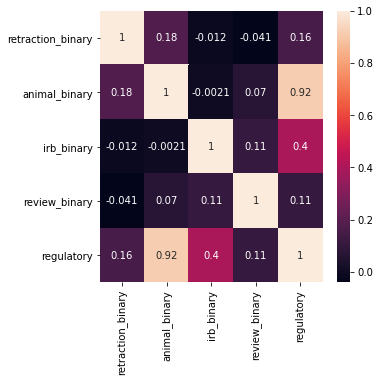

In [362]:
plt.figure(figsize=(5,5))
sns.heatmap(total.corr(), annot=True);

### Character Length

In [15]:
list_words = []
for i in range(0, len(retract['clean_text'])):
    list_words.append(len(retract['clean_text'][i]))
retract['character_length'] = list_words 

list_words = []
for i in range(0, len(no_retract['clean_text'])):
    list_words.append(len(no_retract['clean_text'][i]))
no_retract['character_length'] = list_words 

In [16]:
retract['character_length'].describe()

count    1.537000e+03
mean     6.305490e+04
std      1.593842e+05
min      3.500000e+01
25%      1.940000e+04
50%      3.272200e+04
75%      5.515200e+04
max      1.425053e+06
Name: character_length, dtype: float64

In [17]:
no_retract['character_length'].describe()

count    3.427000e+03
mean     5.884175e+04
std      9.544910e+04
min      4.000000e+00
25%      1.464800e+04
50%      3.168400e+04
75%      5.892150e+04
max      1.293566e+06
Name: character_length, dtype: float64

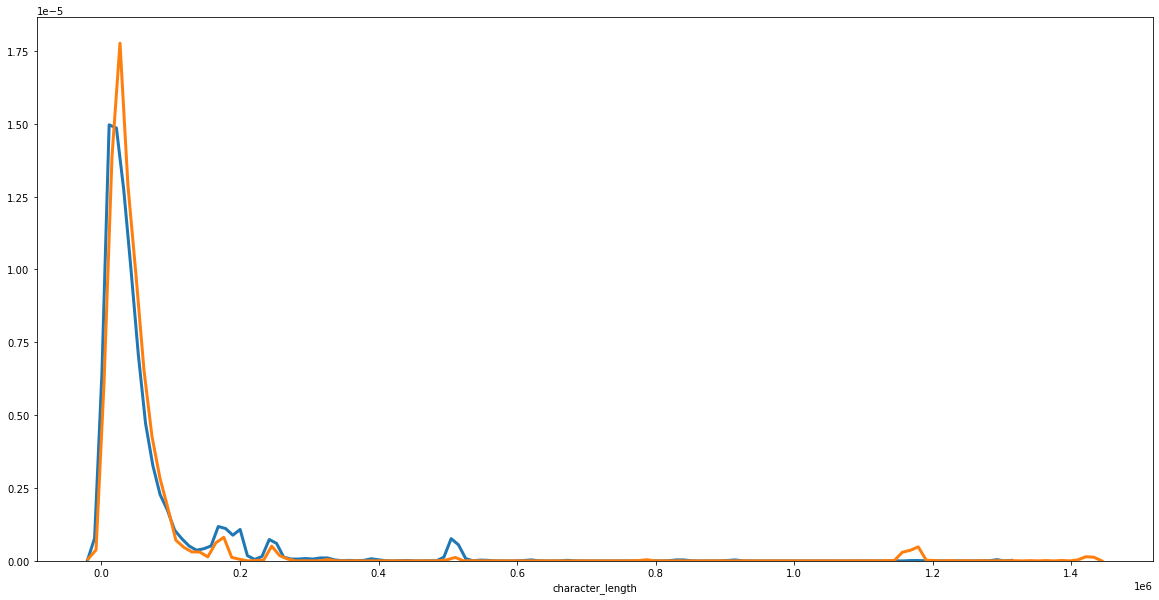

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(no_retract['character_length'], hist=False, kde_kws={"linewidth":3});
sns.distplot(retract['character_length'], hist=False, kde_kws={"linewidth":3});

### Word Count

In [19]:
list_words = []
for i in range(0, len(retract['clean_text'])):
    list_words.append(len(retract['clean_text'][i].split()))
retract['num_words'] = list_words

list_words = []
for i in range(0, len(no_retract['clean_text'])):
    list_words.append(len(no_retract['clean_text'][i].split()))
no_retract['num_words'] = list_words 

In [20]:
retract['num_words'].describe()

count      1537.000000
mean      10076.668185
std       25532.727862
min           6.000000
25%        3042.000000
50%        5152.000000
75%        8917.000000
max      230174.000000
Name: num_words, dtype: float64

In [21]:
no_retract['num_words'].describe()

count      3427.000000
mean       9352.321564
std       15301.982690
min           1.000000
25%        2290.500000
50%        4984.000000
75%        9272.500000
max      205479.000000
Name: num_words, dtype: float64

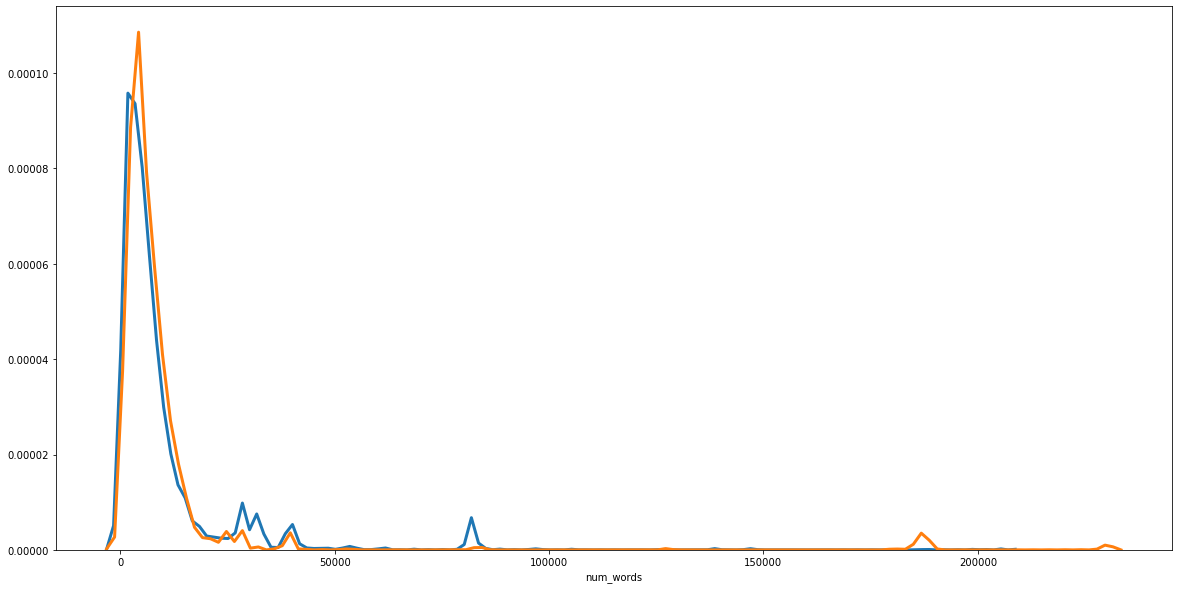

In [22]:
plt.figure(figsize=(20,10))
sns.distplot(no_retract['num_words'], hist=False, kde_kws={"linewidth":3});
sns.distplot(retract['num_words'], hist=False, kde_kws={"linewidth":3});

### Keywords Barplots

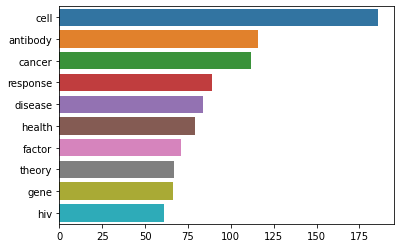

In [23]:
sns.barplot(y=['cell', 'antibody', 'cancer', 'response', 'disease', 'health', 'factor', 'theory', 'gene', 'hiv'],
           x = [186, 116, 112, 89, 84, 79, 71, 67, 66, 61], orient='h');

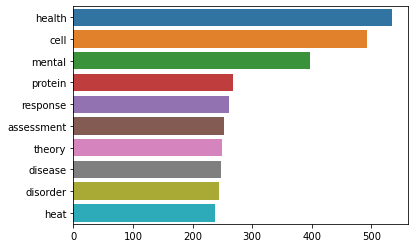

In [24]:
sns.barplot(y=['health', 'cell', 'mental', 'protein', 'response', 'assessment', 'theory', 'disease', 'disorder', 'heat'],
           x = [535, 492, 397, 268, 261, 252, 250, 248, 245, 238], orient='h');

### Year Barplots

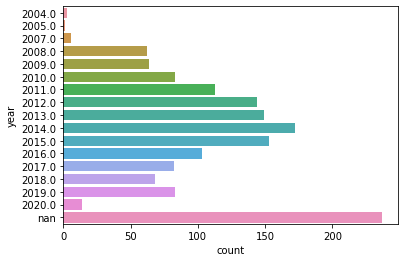

In [30]:
sns.countplot(y= retract['year'], orient='h');

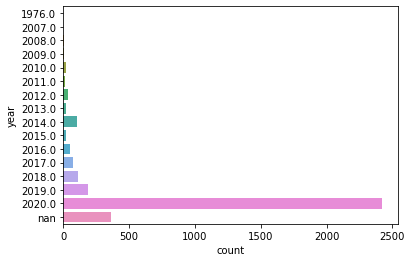

In [31]:
sns.countplot(y =no_retract['year'], orient='h');
#Because of URL set up

### Month Barplots

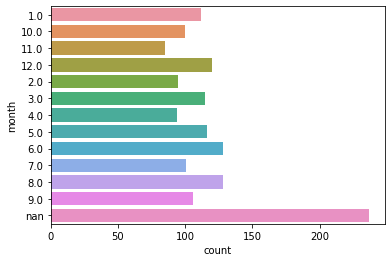

In [34]:
sns.countplot(y=retract['month'], orient='h');

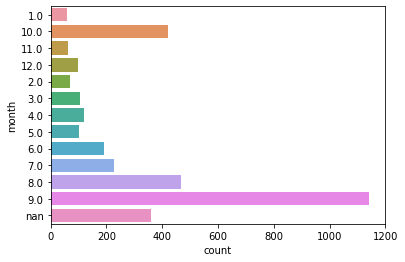

In [35]:
sns.countplot(y=no_retract['month'], orient='h');
#Because of URL set up

### Day Barplots

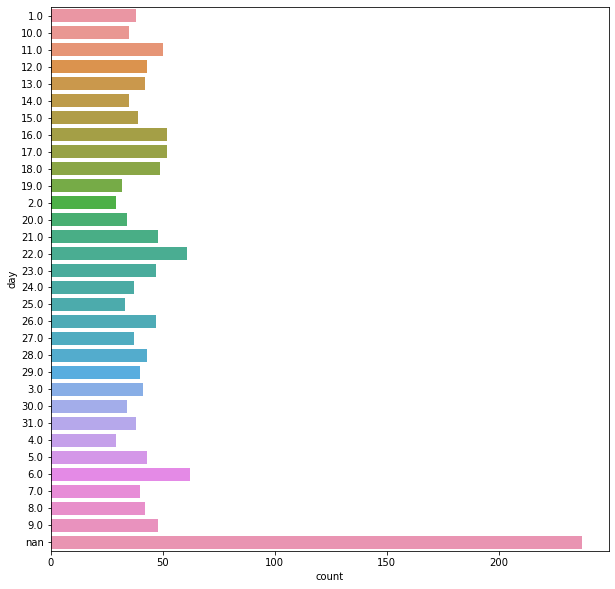

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(y=retract['day'], orient='h');

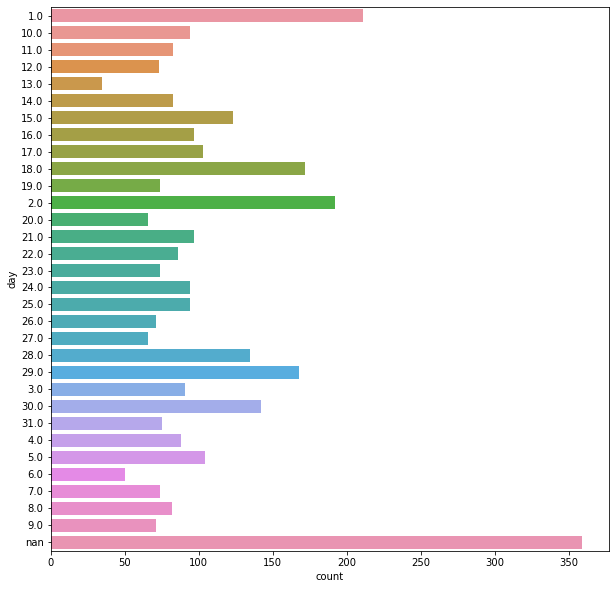

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(y=no_retract['day'], orient='h');

### Volume Barplots

In [39]:
retract['volume'].value_counts().head(11)

9.0     105
7.0     103
8.0      89
10.0     77
5.0      58
11.0     56
12.0     51
6.0      50
3.0      43
nan      34
4.0      33
Name: volume, dtype: int64

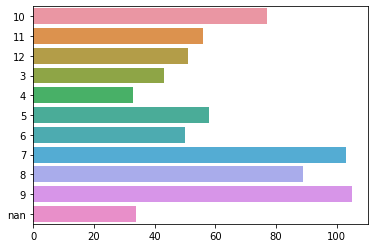

In [40]:
sns.barplot(y=['9', '7', '8', '10', '5', '11', '12', '6', '3', '4', 'nan'],
           x = [105, 103, 89, 77, 58, 56, 51, 50, 43, 33, 34], orient='h');

In [41]:
no_retract['volume'].value_counts().head(11)

nan       328
2020.0    270
12.0      186
7.0       161
6.0       156
11.0      149
8.0       144
10.0      143
13.0      143
9.0       135
14.0      117
Name: volume, dtype: int64

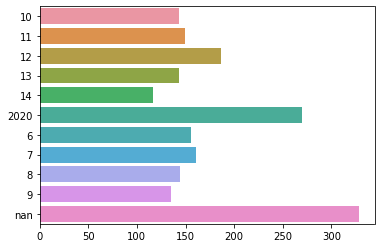

In [42]:
sns.barplot(y=['2020', '12', '7', '6', '11', '8', '10', '13', '9', '14', 'nan'],
           x = [270, 186, 161, 156, 149, 144, 143, 143, 135, 117, 328], orient='h');

In [238]:
#examples of journal articles with volume = 2020
no_retract[69:80]

,doi,year,month,day,volume,issue,journal,title,text,abstract,keywords,publisher,retraction_binary,clean_text
69,10.1155/2020/3407907,2020.0,1.0,7.0,2020.0,NaN,Advances in bioinformatics,Data Analysis and Classification of Autism Spe...,Autism spectrum disorder (ASD) is a condition ...,Autism spectrum disorder (ASD) is an early dev...,[],Hindawi,0,Autism spectrum disorder (ASD) is a condition ...
70,10.1155/2019/6815105,2019.0,7.0,1.0,2019.0,NaN,Advances in bioinformatics,Peptide-Protein Interaction Studies of Antimic...,Middle East Respiratory Syndrome-Coronavirus (...,There is no effective therapeutic or vaccine f...,[],Hindawi,0,Middle East Respiratory Syndrome-Coronavirus (...
71,10.4103/abr.abr_173_19,2020.0,4.0,22.0,9.0,NaN,Advanced biomedical research,Effects of <i>Cyperus rotundus</i> Extract on ...,Alzheimer's disease (AD) is one of the most co...,Background:,"['\nCyperus rotundus\n', '\nneuronal different...",Wolters Kluwer - Medknow,0,Alzheimer's disease (AD) is one of the most co...
72,10.4103/abr.abr_169_19,2020.0,4.0,22.0,9.0,NaN,Advanced biomedical research,Molecular Epidemiology of Anellovirus Infectio...,Anelloviridae is a viral family which is consi...,Background:,"['\nAnellovirus\n', '\nviral infection\n', '\n...",Wolters Kluwer - Medknow,0,Anelloviridae is a viral family which is consi...
73,10.5709/acp-0296-6,2020.0,9.0,3.0,16.0,3.0,Advances in cognitive psychology,Competition Shadow: Anchoring to Fear Versus H...,Innovation is an innately uncertain phenomenon...,We studied the effect of two inconsistent emot...,"['fear', 'hope', 'rival estimation', 'trait an...",University of Economics and Human Sciences in ...,0,Innovation is an innately uncertain phenomenon...
74,10.5709/acp-0295-7,2020.0,8.0,24.0,16.0,3.0,Advances in cognitive psychology,An Investigation on How Inhibition in Cognitiv...,Fluid reasoning—also referred to as fluid inte...,This article reports an investigation of how i...,"['fluid reasoning', 'prepotent response inhibi...",University of Economics and Human Sciences in ...,0,Fluid reasoning—also referred to as fluid inte...
75,10.1155/2020/8768074,2020.0,9.0,9.0,2020.0,NaN,Advances in hematology,Assessing the Performance of Extended Half-Lif...,The one-stage assay is the most common method...,Background,[],Hindawi,0,The one-stage assay is the most common method ...
76,10.1155/2020/7341018,2020.0,8.0,26.0,2020.0,NaN,Advances in hematology,Alopecia and Iron Deficiency: An Interventiona...,The aim was to study the demographic and labo...,Background,[],Hindawi,0,The aim was to study the demographic and labor...
77,10.22114/ajem.v0i0.292,2019.0,12.0,15.0,4.0,2.0,Advanced journal of emergency medicine,Development and Implementation of Integrated R...,Road traffic injuries (RTIs) are a large and g...,Road traffic accidents stand as one of the lea...,"['Accidents, Traffic', 'India', 'Surveillance'...",Tehran University of Medical Sciences,0,Road traffic injuries (RTIs) are a large and g...
78,10.22114/ajem.v0i0.344,2020.0,2.0,17.0,4.0,2.0,Advanced journal of emergency medicine,Sample Size Calculation Guide - Part 7: How to...,"In the previous educational articles, we expla...",NaN,[],Tehran University of Medical Sciences,0,"In the previous educational articles, we expla..."


### Issue Barplots

In [43]:
retract['issue'].value_counts().head(11)

nan     507
1.0     173
3.0      89
4.0      86
2.0      84
6.0      79
5.0      77
7.0      47
8.0      45
10.0     41
12.0     40
Name: issue, dtype: int64

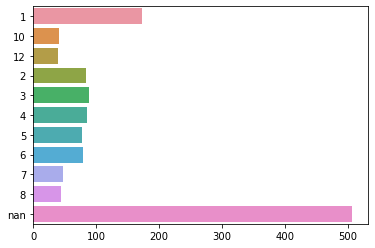

In [44]:
sns.barplot(y=['1', '3', '4', '2', '6', '5', '7', '8', '10', '12', 'nan'],
           x = [173, 89, 86, 84, 79, 77, 47, 45, 41, 40, 507], orient='h');

In [45]:
no_retract['issue'].value_counts().head(11)

nan     1762
1.0      633
2.0      289
3.0      274
4.0      167
5.0       90
9.0       70
10.0      27
8.0       21
6.0       19
12.0       9
Name: issue, dtype: int64

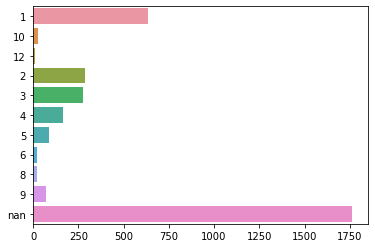

In [47]:
sns.barplot(y=['1', '2', '3', '4', '5', '9', '10', '8', '6', '12', 'nan'],
           x = [633, 289, 274, 167, 90, 70, 27, 21, 19, 9, 1762], orient='h');

In [ ]:
#Should normalize based on percentages for all these graphs

### Journal Barplot

In [48]:
retract['journal'].value_counts().head(10)

PloS one                                                                              229
The Journal of biological chemistry                                                   169
Diagnostic pathology                                                                   30
Acta crystallographica. Section E, Structure reports online                            28
Medicine                                                                               24
OncoTargets and therapy                                                                23
BioMed research international                                                          22
The Journal of neuroscience : the official journal of the Society for Neuroscience     19
European journal of medical research                                                   18
Evidence-based complementary and alternative medicine : eCAM                           15
Name: journal, dtype: int64

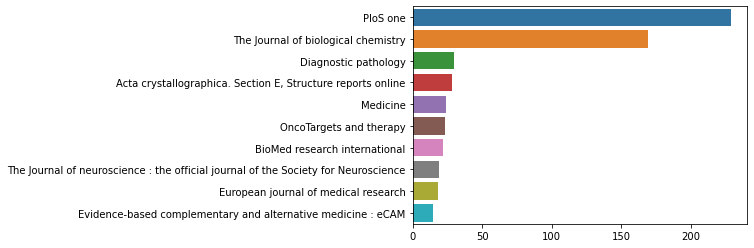

In [49]:
sns.barplot(y=['PloS one', 'The Journal of biological chemistry',
              'Diagnostic pathology', 'Acta crystallographica. Section E, Structure reports online',
              'Medicine', 'OncoTargets and therapy', 'BioMed research international',
              'The Journal of neuroscience : the official journal of the Society for Neuroscience',
              'European journal of medical research', 'Evidence-based complementary and alternative medicine : eCAM'],
           x = [229, 169, 30, 28, 24, 23, 22, 19, 18, 15], orient='h');

### Journal Impact Factor Analysis

|Journal|Impact Factor|Source|Open Access|Free Access|
|---|---|---|---|---|
|PLOS ONE|2.740 (2019)|https://en.wikipedia.org/wiki/PLOS_One#References |Some|Immediate|
|The Journal of biological chemistry|4.238 (2019)|https://www.jbc.org/site/misc/about.xhtml#about-metrics |Some|12 months or less|
|Diagnostic pathology|2.528 (2-year)|https://diagnosticpathology.biomedcentral.com/ |Some|Immediate|
|Acta crystallographica. Section E, Structure reports online|0.347 (2011)|https://journals.iucr.org/e/services/about.html |All|Immediate|
|Medicine|2.133 (2016)|https://journals.lww.com/md-journal/pages/aboutMedicine.aspx |Some|Immediate|
|OncoTargets and therapy|3.046 (2018)|https://en.wikipedia.org/wiki/OncoTargets_and_Therapy |All|Immediate|
|BioMed research international|2.583 (2017)|https://en.wikipedia.org/wiki/BioMed_Research_International |All|Immediate|
|The Journal of neuroscience : the official journal of the Society for Neuroscience|5.673 (2019)|https://www.jneurosci.org/content/about-jneurosci |Some|6 months|
|European journal of medical research|1.414 (2016)|https://en.wikipedia.org/wiki/European_Journal_of_Medical_Research |All|Immediate|
|Evidence-based complementary and alternative medicine : eCAM|1.813 (NA)|https://www.hindawi.com/journals/ecam/ |All|Immediate|

In [101]:
journal_df = pd.read_csv('./journals_in_pmc_clean.csv')
journal_df = journal_df.drop(columns=['Unnamed: 0'])
journal_df.head()

,Journal title,NLM TA,pISSN,eISSN,Publisher,LOCATORplus ID,Latest issue,Earliest volume,Free access,Open access,Participation level,Deposit status,Journal URL,participation_full
0,3 Biotech,3 Biotech,2190-572X,2190-5738,Springer,101565857,v.10(9);Sep 2020,v.1;2011,12 months,Some,Full,,http://www.ncbi.nlm.nih.gov/pmc/journals/1811/,1
1,3D Printing in Medicine,3D Print Med,NaN,2365-6271,BioMed Central,101721758,v.5;Dec 2019,v.2;2016,Immediate,All,Full,,http://www.ncbi.nlm.nih.gov/pmc/journals/3516/,1
2,AACE Clinical Case Reports,AACE Clin Case Rep,NaN,2376-0605,American Association of Clinical Endocrinologists,101670593,v.6(5);Sep-Oct 2020,v.5;2019,Immediate,No,Full,,http://www.ncbi.nlm.nih.gov/pmc/journals/3582/,1
3,The AAPS Journal,AAPS J,NaN,1550-7416,American Association of Pharmaceutical Scientists,101223209,v.18(3);May 2016,v.6;2004,NaN,Some,Full,No New Content,http://www.ncbi.nlm.nih.gov/pmc/journals/792/,1
4,AAPS PharmSci,AAPS PharmSci,NaN,1522-1059,American Association of Pharmaceutical Scientists,100897065,v.6(2);Jun 2004,v.1;1999,Immediate,No,Full,Predecessor,http://www.ncbi.nlm.nih.gov/pmc/journals/989/,1


In [102]:
total['journal'].tail()

4959    Plastic surgery international
4960    Plastic surgery international
4961            Pleura and peritoneum
4962                    PLoS currents
4963                    PLoS currents
Name: journal, dtype: object

In [103]:
journal_df.loc[journal_df['Journal title']=='PLoS Currents']

,Journal title,NLM TA,pISSN,eISSN,Publisher,LOCATORplus ID,Latest issue,Earliest volume,Free access,Open access,Participation level,Deposit status,Journal URL,participation_full
2633,PLoS Currents,PLoS Curr,NaN,2157-3999,Public Library of Science,101515638,v.10(Muscular Dystrophy);2018,v.1;2009,Immediate,All,Full,,http://www.ncbi.nlm.nih.gov/pmc/?term=%22PLoS+...,1


In [104]:
len(journal_df[2633:])

471

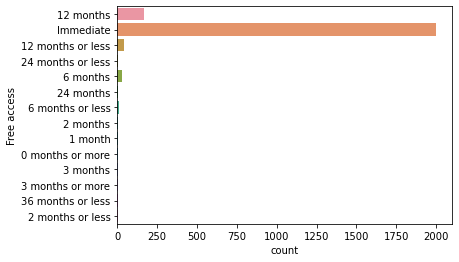

In [248]:
sns.countplot(y=journal_df['Free access'][:2633], orient='h');

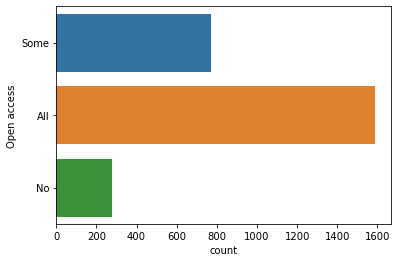

In [250]:
sns.countplot(y = journal_df['Open access'][:2633], orient='h');

In [107]:
journal_df.loc[journal_df['Journal title']=='PLoS ONE']

,Journal title,NLM TA,pISSN,eISSN,Publisher,LOCATORplus ID,Latest issue,Earliest volume,Free access,Open access,Participation level,Deposit status,Journal URL,participation_full
2637,PLoS ONE,PLoS One,NaN,1932-6203,Public Library of Science,101285081,v.15(9);2020,v.1;2006,Immediate,Some,Full,,http://www.ncbi.nlm.nih.gov/pmc/journals/440/,1


In [111]:
tokenizer = RegexpTokenizer(r'\w+')
ls = []
for i in journal_df['Journal title']:
    text = i.lower()
    tokens = tokenizer.tokenize(text)
    ls.append(' '.join(tokens))
journal_df['Journal title'] = ls
journal_df.head()

,Journal title,NLM TA,pISSN,eISSN,Publisher,LOCATORplus ID,Latest issue,Earliest volume,Free access,Open access,Participation level,Deposit status,Journal URL,participation_full
0,3 biotech,3 Biotech,2190-572X,2190-5738,Springer,101565857,v.10(9);Sep 2020,v.1;2011,12 months,Some,Full,,http://www.ncbi.nlm.nih.gov/pmc/journals/1811/,1
1,3d printing in medicine,3D Print Med,NaN,2365-6271,BioMed Central,101721758,v.5;Dec 2019,v.2;2016,Immediate,All,Full,,http://www.ncbi.nlm.nih.gov/pmc/journals/3516/,1
2,aace clinical case reports,AACE Clin Case Rep,NaN,2376-0605,American Association of Clinical Endocrinologists,101670593,v.6(5);Sep-Oct 2020,v.5;2019,Immediate,No,Full,,http://www.ncbi.nlm.nih.gov/pmc/journals/3582/,1
3,the aaps journal,AAPS J,NaN,1550-7416,American Association of Pharmaceutical Scientists,101223209,v.18(3);May 2016,v.6;2004,NaN,Some,Full,No New Content,http://www.ncbi.nlm.nih.gov/pmc/journals/792/,1
4,aaps pharmsci,AAPS PharmSci,NaN,1522-1059,American Association of Pharmaceutical Scientists,100897065,v.6(2);Jun 2004,v.1;1999,Immediate,No,Full,Predecessor,http://www.ncbi.nlm.nih.gov/pmc/journals/989/,1


In [ ]:
ls_free_access = []
ls_open_access = []
ls_except_count = []
count = 0
for i in retract['journal']:
    try:
        text = i.lower()
        tokens = tokenizer.tokenize(text)
        text_clean = ' '.join(tokens)
        x = journal_df.loc[journal_df['Journal title'] == text_clean].index[0]
#         ls_free_access.append(journal_df['Free access'][x])
        ls_open_access.append(journal_df['Open access'][x])
    except:
#         ls_free_access.append('')
        ls_open_access.append('')
        print(count)
        ls_except_count.append(count)
    count +=1

In [128]:
#free access
print(ls_except_count)

[37, 45, 47, 57, 66, 67, 75, 76, 77, 78, 89, 182, 183, 184, 185, 188, 189, 199, 220, 239, 240, 241, 242, 243, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 270, 275, 276, 278, 369, 387, 388, 389, 390, 391, 393, 445, 446, 447, 448, 449, 452, 453, 458, 460, 465, 466, 467, 468, 469, 470, 471, 486, 545, 546, 567, 589, 599, 600, 779, 780, 801, 803, 804, 812, 813, 814, 815, 816, 817, 826, 827, 832, 838, 839, 840, 846, 847, 848, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 945, 969, 976, 977, 978, 991, 995, 996, 1008, 1010, 1026, 1030, 1031, 1034, 1035, 1036, 1037, 1038, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1048, 1051, 1071, 1072, 1073, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1110, 1111, 1116, 1117, 1180, 1193, 1194, 1206, 1207, 1208, 1209, 1210, 1221, 1474, 1479, 1484, 1485, 1486, 1489, 1490, 1491, 1496, 1497, 1498, 1499, 1512, 1517, 1536]


In [130]:
#open access
print(ls_except_count)

[37, 45, 47, 57, 66, 67, 75, 76, 77, 78, 89, 182, 183, 184, 185, 188, 189, 199, 220, 239, 240, 241, 242, 243, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 270, 275, 276, 278, 369, 387, 388, 389, 390, 391, 393, 445, 446, 447, 448, 449, 452, 453, 458, 460, 465, 466, 467, 468, 469, 470, 471, 486, 545, 546, 567, 589, 599, 600, 779, 780, 801, 803, 804, 812, 813, 814, 815, 816, 817, 826, 827, 832, 838, 839, 840, 846, 847, 848, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 945, 969, 976, 977, 978, 991, 995, 996, 1008, 1010, 1026, 1030, 1031, 1034, 1035, 1036, 1037, 1038, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1048, 1051, 1071, 1072, 1073, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1110, 1111, 1116, 1117, 1180, 1193, 1194, 1206, 1207, 1208, 1209, 1210, 1221, 1474, 1479, 1484, 1485, 1486, 1489, 1490, 1491, 1496, 1497, 1498, 1499, 1512, 1517, 1536]


In [ ]:
#https://stackoverflow.com/questions/42334197/add-only-unique-values-to-a-list-in-python/42334215
not_included = []
for i in ls_except_count:
    if {retract['journal'][i]:len(retract.loc[retract['journal']==retract['journal'][i]])} not in not_included:
        not_included.append({retract['journal'][i]:len(retract.loc[retract['journal']==retract['journal'][i]])})
print(not_included)

In [134]:
print(retract.shape)
len(not_included)

(1537, 16)


87

In [233]:
not_included[86]

{'Zhongguo fei ai za zhi = Chinese journal of lung cancer': 1}

In [241]:
#free access
immediate = [1, 1, 1, 1, 1, 1, 3, 1, 1, 10, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 2, 2, 
             1, 6, 1, 1, 3, 3, 1, 1, 3, 1, 2, 1, 6, 1, 2, 1, 2, 1, 1, 3, 3, 4, 1, 1, 1, 975]
twentyfour_months = [15]
twentyfour_months_or_less = [1]
twelve_months_or_less = [1, 3, 1, 1, 202]
twelve_months = [1, 1, 5, 2, 4, 1, 2, 1, 1, 3, 1, 1, 1, 5, 42]
no_data = [4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
zero_months_or_more = [1]
six_months_or_less = [4, 46]
six_months = [19, 7]
one_month = [2]
two_months_or_less = [2]
two_months = [1]

In [251]:
free_access_types = ['immediate', '24 months', '24 months or less', '12 months or less', 
               '12 months', 'no data', '0 months or more', '6 months or less', 
               '6 months', '1 month', '2 months or less', '2 months']
free_access = [sum(immediate), sum(twentyfour_months), sum(twentyfour_months_or_less), sum(twelve_months_or_less), 
               sum(twelve_months), sum(no_data), sum(zero_months_or_more), sum(six_months_or_less), 
               sum(six_months), sum(one_month), sum(two_months_or_less), sum(two_months)]

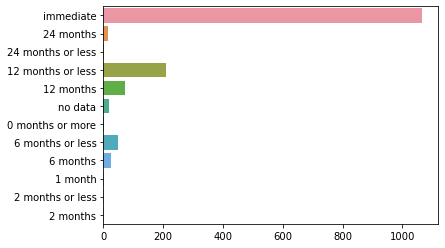

In [252]:
sns.barplot(y= free_access_types, x=free_access);

In [242]:
#open access
all_ = [1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 2, 1, 6, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 3, 3, 1, 1, 604]
some = [1, 1, 1, 3, 1, 5, 10, 2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 1, 3, 
        19, 3, 1, 1, 3, 1, 1, 3, 6, 1, 1, 1, 2, 5, 1, 4, 717]
no = [4, 1, 4, 1, 1, 42]
no_data = [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]

In [253]:
open_access_types = ['all', 'some', 'no', 'no data']
open_access = [sum(all_), sum(some), sum(no), sum(no_data)]

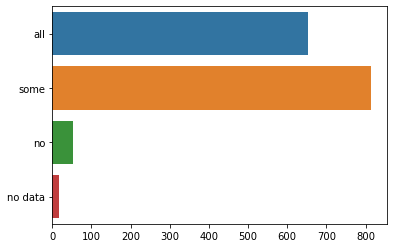

In [254]:
sns.barplot(y= open_access_types, x=open_access);

### Publisher Barplots

In [34]:
retract['publisher'].value_counts(normalize=True).head(10)

Public Library of Science                 0.191129
BioMed Central                            0.168950
Hindawi Publishing Corporation            0.078930
Medknow Publications & Media Pvt Ltd      0.057404
Dove Medical Press                        0.038487
Nature Publishing Group UK                0.032616
Frontiers Media S.A.                      0.030007
International Union of Crystallography    0.026745
Nature Publishing Group                   0.020222
John Wiley and Sons Inc.                  0.018917
Name: publisher, dtype: float64

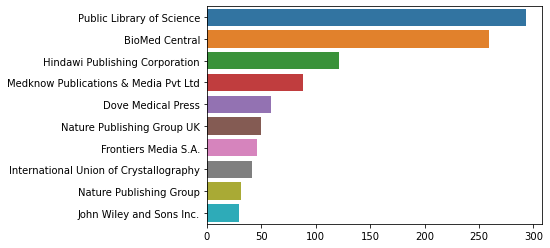

In [18]:
sns.barplot(y=['Public Library of Science', 'BioMed Central', 'Hindawi Publishing Corporation', 
               'Medknow Publications & Media Pvt Ltd', 'Dove Medical Press', 'Nature Publishing Group UK',
              'Frontiers Media S.A.', 'International Union of Crystallography', 'Nature Publishing Group',
              'John Wiley and Sons Inc.'],
           x = [293, 259, 121, 88, 59, 50, 46, 41, 31, 29], orient='h');

In [35]:
no_retract['publisher'].value_counts(normalize=True).head(10)

BioMed Central                    0.159696
Hindawi                           0.091840
Elsevier                          0.059082
SAGE Publications                 0.052062
Wolters Kluwer - Medknow          0.045335
Dove                              0.035390
Hindawi Publishing Corporation    0.031296
Frontiers Media S.A.              0.025446
John Wiley and Sons Inc.          0.022229
American Chemical Society         0.022229
Name: publisher, dtype: float64

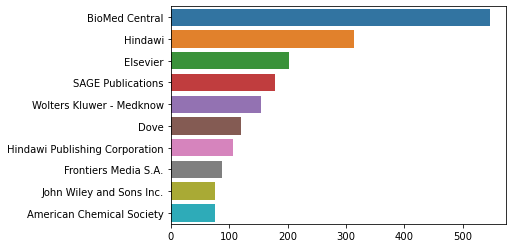

In [19]:
sns.barplot(y=['BioMed Central', 'Hindawi', 'Elsevier', 'SAGE Publications', 'Wolters Kluwer - Medknow',
              'Dove', 'Hindawi Publishing Corporation', 'Frontiers Media S.A.', 'John Wiley and Sons Inc.',
              'American Chemical Society'],
           x = [546, 314, 202, 178, 155, 121, 107, 87, 76, 76], orient='h');